# Proyecto análisis de conversación de mensajería

## Cargar datos
- Exportar una conversación personal o grupal de Whastapp o Telegram en un formato adecuado (JSON, CSV, etc), no exportar audios, archivos multimedia, etc
- Importar archivo y convertirlo en dataframe
- Obtener y graficar los siguientes datos. Elegir el gráfico que mejor represente los datos

In [4]:
import pandas as pd
import matplotlib.pyplot as pp
%matplotlib inline
import json

with open("chat_telegram.json", 'r+', encoding='utf-8') as f:
    data = json.load(f)

df = pd.DataFrame(data["messages"])

### Cantidad de mensajes enviados por cada usuario

In [2]:
groups = ['from']
df2 = df.groupby(groups, as_index=False).agg(messages = ('text','count'))
df2

,from,messages
0,Douglas,1
1,Gabriel Arenas 🇦🇷,15
2,Marcos Miglierina,2
3,Nicolás Mayoral,2
4,Ramiro Alberto Giandinoto,3
5,jose ruti,2


c:\Users\op7ma\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127462 (\N{REGIONAL INDICATOR SYMBOL LETTER A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\op7ma\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127479 (\N{REGIONAL INDICATOR SYMBOL LETTER R}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


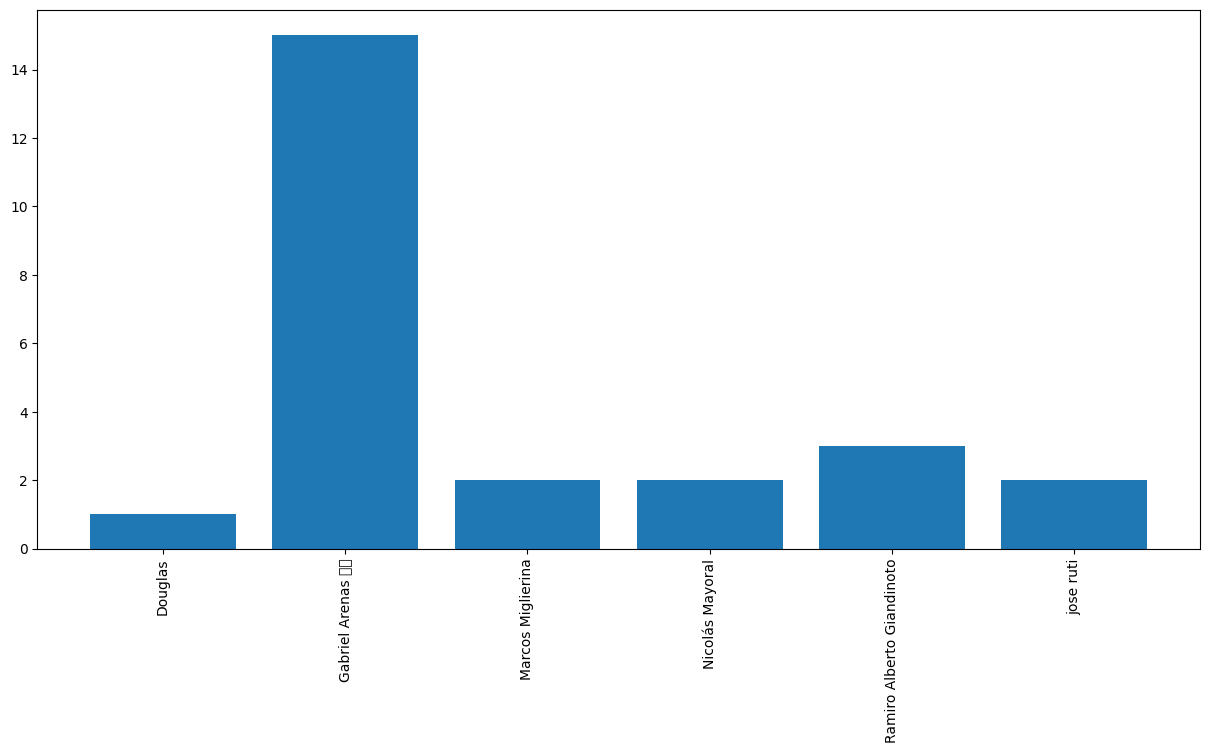

In [7]:
pp.figure(figsize = (15,7))
pp.bar(df2['from'],df2["messages"])
pp.xticks(rotation = 90)
pp.show()

### Promedio de palabras utilizadas por mensaje por cada usuario

In [9]:
df['total_words'] = [len(str(x).split(" ")) for x in df['text']]
columns = ['from', 'total_words']
agregations = {'total_words':['min', 'max', 'mean']}
df.groupby(columns, as_index=False).agg(agregations)

df['total_words'] = [len(str(x).split(" ")) for x in df['text']]
df2 = df.groupby(['from'])[['total_words']].mean()


,total_words
from,
Douglas,5.000000
Gabriel Arenas 🇦🇷,35.333333
Marcos Miglierina,13.000000
Nicolás Mayoral,3.000000
Ramiro Alberto Giandinoto,3.000000
jose ruti,5.500000


c:\Users\op7ma\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 127462 (\N{REGIONAL INDICATOR SYMBOL LETTER A}) missing from current font.
  func(*args, **kwargs)
c:\Users\op7ma\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 127479 (\N{REGIONAL INDICATOR SYMBOL LETTER R}) missing from current font.
  func(*args, **kwargs)
c:\Users\op7ma\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127462 (\N{REGIONAL INDICATOR SYMBOL LETTER A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\op7ma\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127479 (\N{REGIONAL INDICATOR SYMBOL LETTER R}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


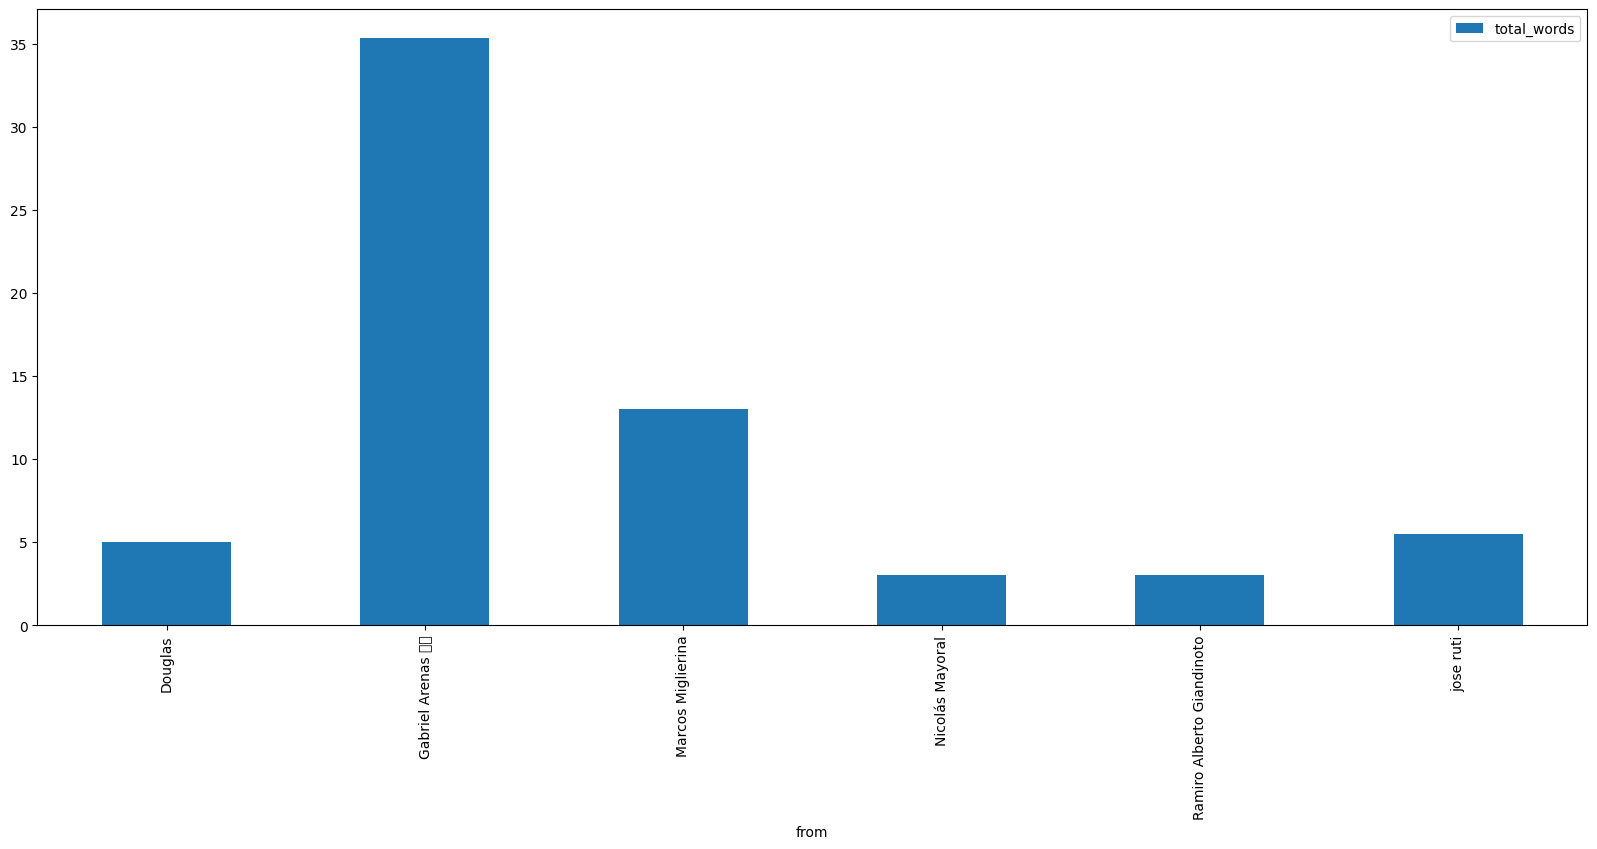

In [10]:
df2.plot(kind='bar', figsize=(20,8))
df2

### Porcentaje de mensajes enviados por cada usuario

In [11]:
df2 = df.groupby('from')['type'].count()/df['type'].count()*100
df2

from
Douglas                       3.448276
Gabriel Arenas 🇦🇷            51.724138
Marcos Miglierina             6.896552
Nicolás Mayoral               6.896552
Ramiro Alberto Giandinoto    10.344828
jose ruti                     6.896552
Name: type, dtype: float64

<AxesSubplot: xlabel='from'>

c:\Users\op7ma\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 127462 (\N{REGIONAL INDICATOR SYMBOL LETTER A}) missing from current font.
  func(*args, **kwargs)
c:\Users\op7ma\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 127479 (\N{REGIONAL INDICATOR SYMBOL LETTER R}) missing from current font.
  func(*args, **kwargs)
c:\Users\op7ma\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127462 (\N{REGIONAL INDICATOR SYMBOL LETTER A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\op7ma\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127479 (\N{REGIONAL INDICATOR SYMBOL LETTER R}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


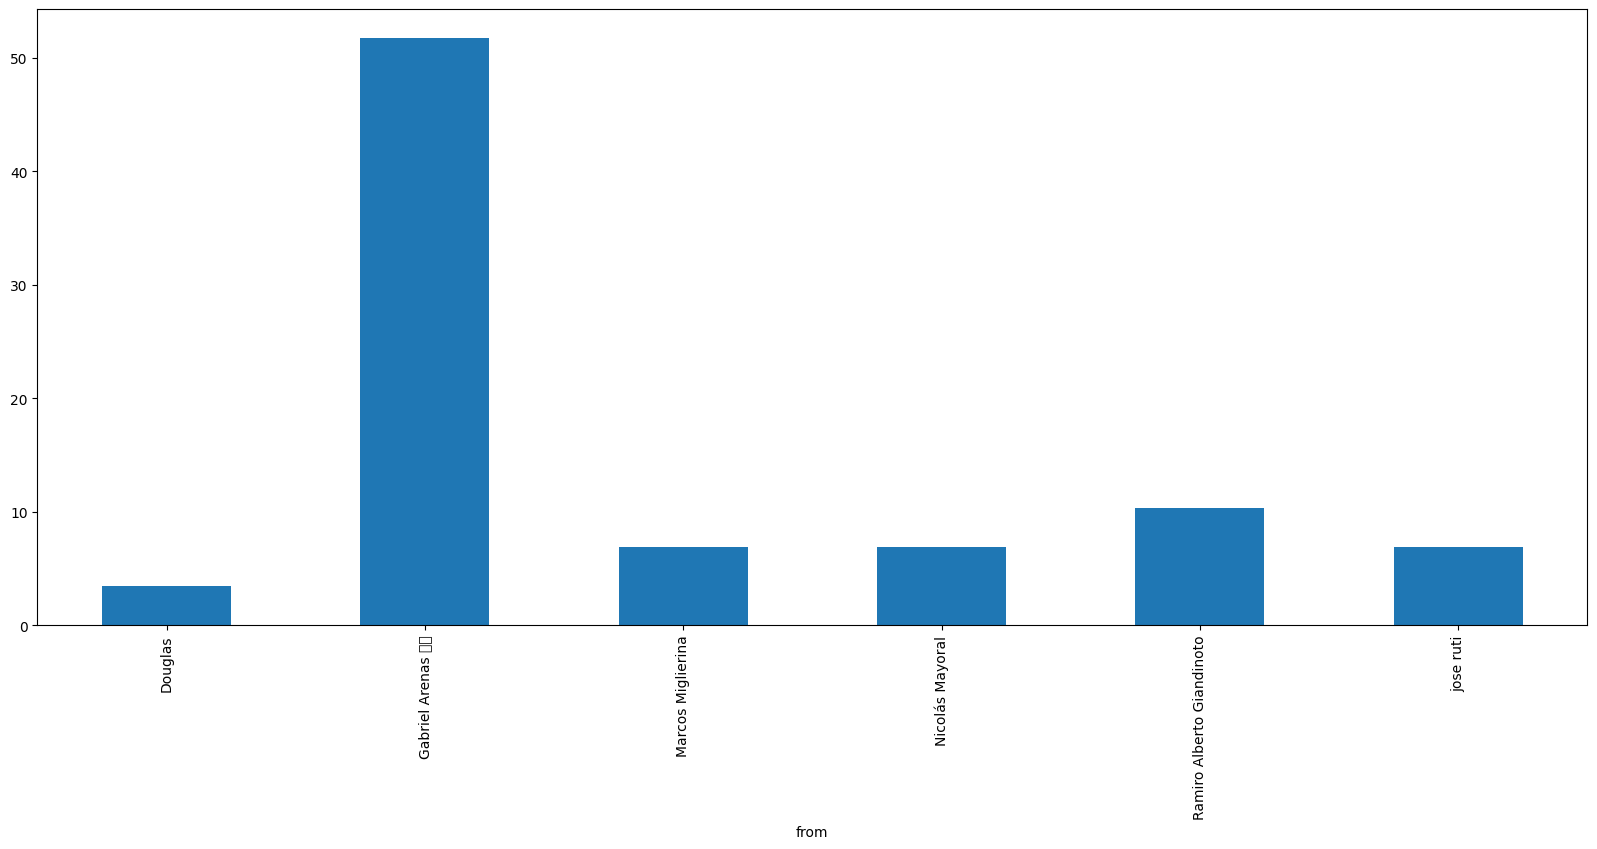

In [12]:
df2.plot(kind='bar', figsize=(20,8))

### Frecuencia de envío de mensaje dependiendo la hora del día

hour_only
10    3
11    5
12    1
13    1
14    1
15    1
16    4
17    7
18    5
19    1
Name: type, dtype: int64

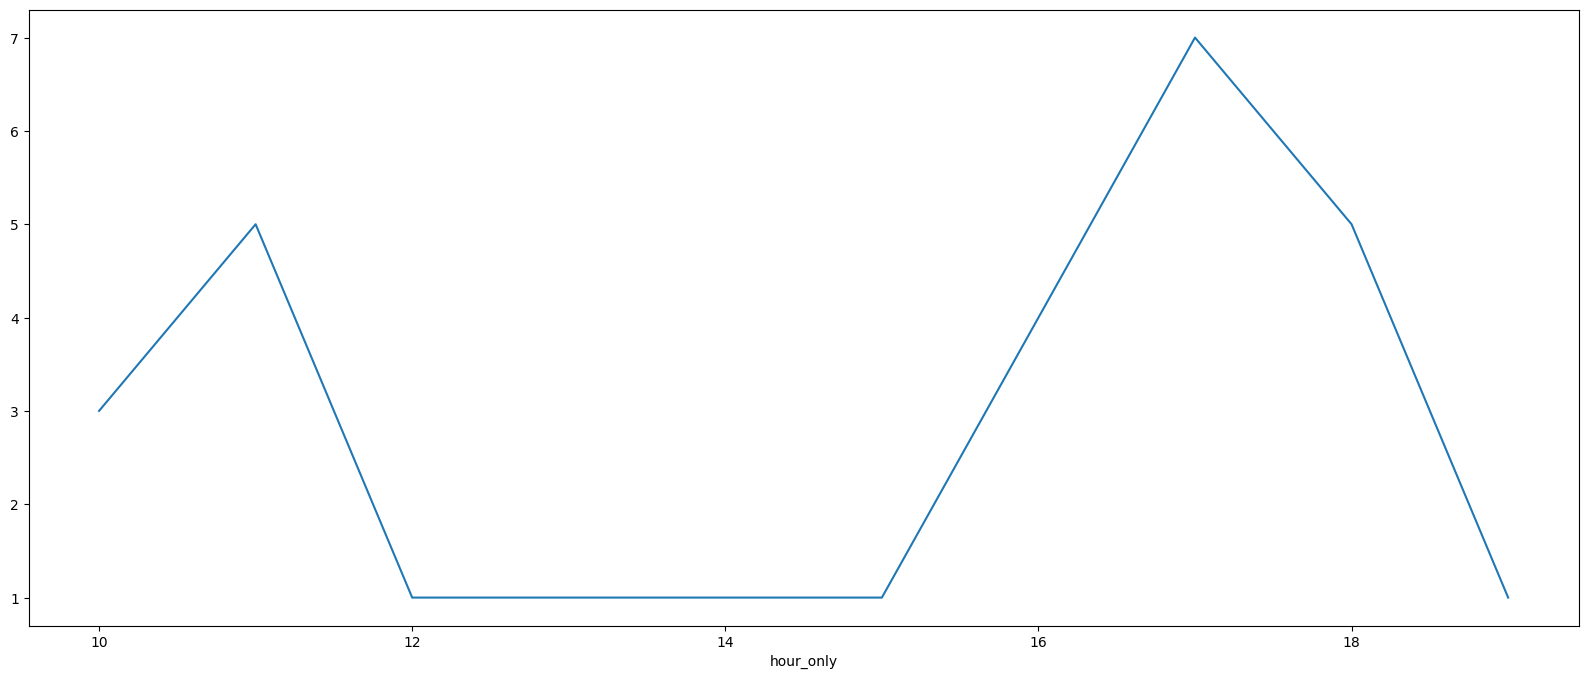

In [13]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%dT%H:%M')
df['hour_only'] = pd.to_datetime(df['date'], format='%Y-%m-%dT%H:%M').dt.hour
df2 = df.groupby('hour_only')['type'].count()
df2.plot(figsize=(20,8))
df2

### Frecuencia de envío de mensaje dependiendo del día de la semana

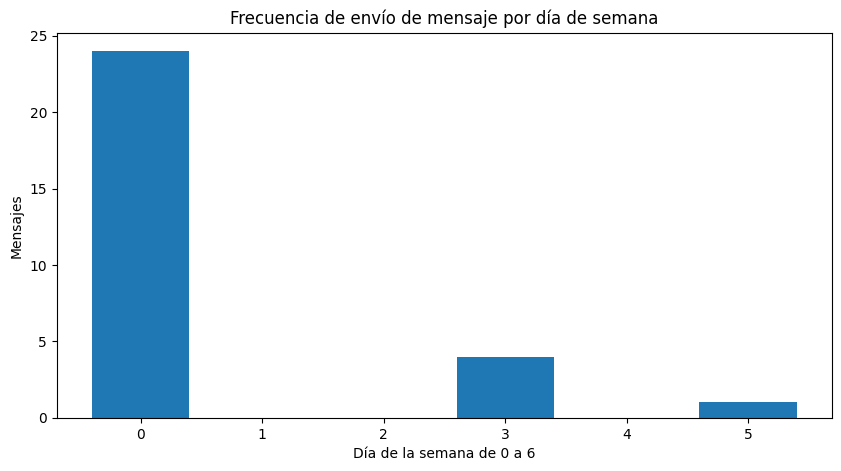

,frecuency
date,
0,24
3,4
5,1


In [15]:
groups = [df['date'].dt.weekday]
df3 = df.groupby(groups).agg(frecuency = ('id', 'count'))

pp.figure(figsize=(10,5))
pp.xlabel("Día de la semana de 0 a 6")
pp.ylabel("Mensajes")
pp.title("Frecuencia de envío de mensaje por día de semana")
pp.bar(df3.index, df3['frecuency'])
pp.show()
df3

### Hora del día preferida por cada usuario para enviar mensajes

In [19]:
groups = ["from"]
df2 = df.groupby(groups).agg(hora_favorita = ("date", lambda x: x.dt.hour.mode()))
df2

,hora_favorita
from,
Douglas,16
Gabriel Arenas 🇦🇷,18
Marcos Miglierina,10
Nicolás Mayoral,"[11, 17]"
Ramiro Alberto Giandinoto,17
jose ruti,"[11, 17]"


### Día de la semana preferida por cada usuario para enviar mensajes

In [21]:
groups = ["from"]
df.groupby(groups).agg(día_favorito = ("date", lambda x: x.dt.weekday.mode()))

,día_favorito
from,
Douglas,0
Gabriel Arenas 🇦🇷,0
Marcos Miglierina,3
Nicolás Mayoral,0
Ramiro Alberto Giandinoto,0
jose ruti,0


### Cantidad promedio de mensajes enviados por hora para cada usuario

In [23]:
num_dias = (df['date'].max() - df['date'].min()).days
groups = ['from']
agregations = {
    'text': lambda x: (x.count()/24)/num_dias
    
}
df.groupby(groups).agg(agregations)


,text
from,
Douglas,0.000563
Gabriel Arenas 🇦🇷,0.008446
Marcos Miglierina,0.001126
Nicolás Mayoral,0.001126
Ramiro Alberto Giandinoto,0.001689
jose ruti,0.001126


### Cantidad de usuarios promedio que envían mensaje por cada día de la semana

### Cantidad de mensajes envíados por mes

### Cantidad mínima, máxima y promedio de palabras por mensaje